In [3]:
# Install required libraries with proper dependencies
!pip install requests-html nest-asyncio pandas beautifulsoup4 lxml_html_clean
!pip install pyppeteer

**Data Acquisition & Preprocessing**

In [4]:
# Import libraries
from requests_html import AsyncHTMLSession
import nest_asyncio
import asyncio
import pandas as pd
from bs4 import BeautifulSoup
import os
import shutil

# Apply nest_asyncio for Jupyter/Colab environments
nest_asyncio.apply()

In [5]:
# Install and set up Chromium for Colab
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

# Set up environment variables
import os
os.environ["PYPPETEER_CHROMIUM_REVISION"] = "1263111"  # Use a specific revision that works

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,123 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,434 kB]
Get:13 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubun

In [10]:
# Define the scraping function
async def scrape_redmi_reviews():
    asession = AsyncHTMLSession()

    base_url = (
        "https://www.flipkart.com/redmi-note-14-pro-5g-titan-black-128-gb/product-reviews/"
        "itm901beaf85e746?pid=MOBH89EKJNVD8N2Y&lid=LSTMOBH89EKJNVD8N2YDRSGDM"
        "&marketplace=FLIPKART&page="
    )

    all_reviews = []

    # Try first 5 pages to start
    for page in range(1, 11):
        print(f"Scraping page {page}...")
        url = base_url + str(page)

        try:
            r = await asession.get(url)

            # Render JavaScript with longer timeout
            await r.html.arender(timeout=30, sleep=2)

            soup = BeautifulSoup(r.html.html, 'html.parser')

            # Extract reviews using the same class names
            reviews = [div.get_text(strip=True) for div in soup.find_all("div", class_="ZmyHeo")]
            ratings = [div.get_text(strip=True) for div in soup.find_all("div", class_="XQDdHH")]
            titles = [p.get_text(strip=True) for p in soup.find_all("p", class_="z9E0IG")]
            names = [p.get_text(strip=True) for p in soup.find_all("p", class_="_2NsDsF AwS1CA")]

            for i in range(len(reviews)):
                all_reviews.append({
                    'name': names[i] if i < len(names) else "N/A",
                    'title': titles[i] if i < len(titles) else "N/A",
                    'rating': ratings[i] if i < len(ratings) else "N/A",
                    'review': reviews[i]
                })

            print(f"Page {page}: Found {len(reviews)} reviews")

            # Small delay between pages
            await asyncio.sleep(2)

        except Exception as e:
            print(f"Error on page {page}: {e}")
            continue

    return all_reviews

In [11]:
# Run the scraper
print("Starting Redmi Note 14 Pro review scraping...")
reviews_data = await scrape_redmi_reviews()

Starting Redmi Note 14 Pro review scraping...
Scraping page 1...


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error Target.detachFromTarget: Target closed.')>
pyppeteer.errors.NetworkError: Protocol error Target.detachFromTarget: Target closed.
ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error (Target.sendMessageToTarget): No session with given id')>
pyppeteer.errors.NetworkError: Protocol error (Target.sendMessageToTarget): No session with given id


Page 1: Found 10 reviews
Scraping page 2...


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error Target.detachFromTarget: Target closed.')>
pyppeteer.errors.NetworkError: Protocol error Target.detachFromTarget: Target closed.
ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error (Target.sendMessageToTarget): No session with given id')>
pyppeteer.errors.NetworkError: Protocol error (Target.sendMessageToTarget): No session with given id


Page 2: Found 10 reviews
Scraping page 3...


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error Target.detachFromTarget: Target closed.')>
pyppeteer.errors.NetworkError: Protocol error Target.detachFromTarget: Target closed.
ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error (Target.sendMessageToTarget): No session with given id')>
pyppeteer.errors.NetworkError: Protocol error (Target.sendMessageToTarget): No session with given id


Page 3: Found 10 reviews
Scraping page 4...


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error Target.detachFromTarget: Target closed.')>
pyppeteer.errors.NetworkError: Protocol error Target.detachFromTarget: Target closed.
ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error (Target.sendMessageToTarget): No session with given id')>
pyppeteer.errors.NetworkError: Protocol error (Target.sendMessageToTarget): No session with given id


Page 4: Found 10 reviews
Scraping page 5...


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error Target.detachFromTarget: Target closed.')>
pyppeteer.errors.NetworkError: Protocol error Target.detachFromTarget: Target closed.
ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error (Target.sendMessageToTarget): No session with given id')>
pyppeteer.errors.NetworkError: Protocol error (Target.sendMessageToTarget): No session with given id


Page 5: Found 10 reviews
Scraping page 6...


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error Target.detachFromTarget: Target closed.')>
pyppeteer.errors.NetworkError: Protocol error Target.detachFromTarget: Target closed.
ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error (Target.sendMessageToTarget): No session with given id')>
pyppeteer.errors.NetworkError: Protocol error (Target.sendMessageToTarget): No session with given id


Page 6: Found 10 reviews
Scraping page 7...


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error Target.detachFromTarget: Target closed.')>
pyppeteer.errors.NetworkError: Protocol error Target.detachFromTarget: Target closed.
ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error (Target.sendMessageToTarget): No session with given id')>
pyppeteer.errors.NetworkError: Protocol error (Target.sendMessageToTarget): No session with given id


Page 7: Found 10 reviews
Scraping page 8...


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error Target.detachFromTarget: Target closed.')>
pyppeteer.errors.NetworkError: Protocol error Target.detachFromTarget: Target closed.
ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error (Target.sendMessageToTarget): No session with given id')>
pyppeteer.errors.NetworkError: Protocol error (Target.sendMessageToTarget): No session with given id


Page 8: Found 10 reviews
Scraping page 9...


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error Target.detachFromTarget: Target closed.')>
pyppeteer.errors.NetworkError: Protocol error Target.detachFromTarget: Target closed.
ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error (Target.sendMessageToTarget): No session with given id')>
pyppeteer.errors.NetworkError: Protocol error (Target.sendMessageToTarget): No session with given id


Page 9: Found 10 reviews
Scraping page 10...


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error Target.detachFromTarget: Target closed.')>
pyppeteer.errors.NetworkError: Protocol error Target.detachFromTarget: Target closed.
ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error (Target.sendMessageToTarget): No session with given id')>
pyppeteer.errors.NetworkError: Protocol error (Target.sendMessageToTarget): No session with given id


Page 10: Found 10 reviews


In [12]:
# Save and display results
if reviews_data:
    df = pd.DataFrame(reviews_data)
    df.to_csv('redmi_note14_reviews.csv', index=False, encoding='utf-8')

    print(f"\n✅ Successfully collected {len(df)} reviews!")
    print(f"📊 Dataset saved to 'redmi_note14_reviews.csv'")

    # Display sample
    print("\n📝 Sample Reviews:")
    print(df.head(10).to_string(index=False))

else:
    print("No reviews collected.")


✅ Successfully collected 100 reviews!
📊 Dataset saved to 'redmi_note14_reviews.csv'

📝 Sample Reviews:
                   name                title rating                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               review
           Rudrajit Dey        Great product    4.3                                                                                                                                                          Excellent phone. Received today with 1 day delivery at no extra cost. I upgraded from Redmi Note 8 pro to this one. Apps.and settings tran

In [13]:
#To downlaod the CSV locally
from google.colab import files
files.download('redmi_note14_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Data Quality Assessment**

In [29]:
# Data Quality Assessment
print("=== DATA QUALITY ASSESSMENT ===\n")

print(f"Dataset Shape: {df.shape}")
print(f"Duplicate Reviews: {df['review'].duplicated().sum()}")
print(f"Duplicate Percentage: {(df['review'].duplicated().sum()/len(df))*100:.1f}%")

# Remove duplicates
initial_count = len(df)
df = df.drop_duplicates(subset=['review'])
final_count = len(df)
print(f"Duplicates removed: {initial_count - final_count}")

# Data validation
print(f"Rating Range: {df['rating'].min()} to {df['rating'].max()}")
print(f"Unique Ratings: {sorted(df['rating'].unique())}")

# Text quality metrics
df['review_length'] = df['review'].apply(lambda x: len(str(x)))
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))
print(f"Average Review Length: {df['review_length'].mean():.0f} characters")
print(f"Average Word Count: {df['word_count'].mean():.0f} words")

print("✅ Data Quality Assessment Completed!")

=== DATA QUALITY ASSESSMENT ===

Dataset Shape: (100, 4)
Duplicate Reviews: 7
Duplicate Percentage: 7.0%
Duplicates removed: 7
Rating Range: 1.0 to 5.0
Unique Ratings: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(4.3), np.float64(5.0)]
Average Review Length: 67 characters
Average Word Count: 11 words
✅ Data Quality Assessment Completed!


**Advanced NLP - Word Frequency**

In [32]:
# Advanced NLP - Word Frequency Analysis
print("=== ADVANCED NLP ANALYSIS ===\n")

import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)
        words = text.lower().split()
        words = [w for w in words if w not in stop_words and len(w) > 2]
        return ' '.join(words)
    return ""

# Use cleaned_review if present; else fall back to review
source_col = 'cleaned_review' if 'cleaned_review' in df.columns else 'review'
df['processed_review'] = df[source_col].apply(preprocess_text)

# Word frequency
all_words = ' '.join(df['processed_review']).split()
word_freq = Counter(all_words)

print("Top 20 Most Frequent Words:")
top_words = word_freq.most_common(20)
for word, freq in top_words:
    print(f"  {word}: {freq}")

=== ADVANCED NLP ANALYSIS ===

Top 20 Most Frequent Words:
  good: 43
  read: 31
  phone: 26
  camera: 26
  battery: 17
  nice: 15
  product: 14
  best: 14
  redmi: 12
  quality: 11
  pro: 10
  mobile: 10
  performance: 9
  phoneread: 8
  excellent: 7
  note: 7
  display: 7
  awesome: 6
  goodread: 6
  design: 6


=== STATISTICAL TESTS ===

Rating Normality (Shapiro) - W=0.654, p=0.0000
Rating vs Review Length (Pearson)  r=0.042, p=0.6887
Rating vs Review Length (Spearman) r=0.069, p=0.5097
High (>=4) vs Low (<=2) review lengths: t=0.550, p=0.6009


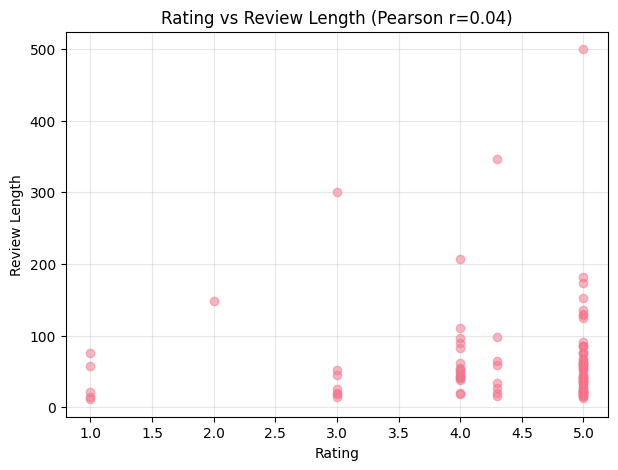

<Figure size 800x500 with 0 Axes>

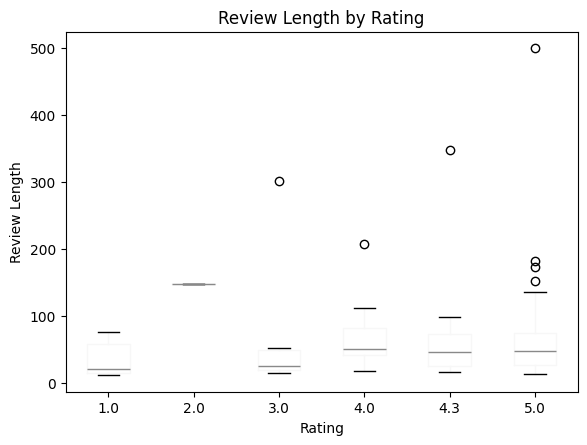

✅ Statistical Tests Completed!


In [33]:
# Statistical Significance Tests
print("=== STATISTICAL TESTS ===\n")

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Ensure review_length exists (from Cell 14), else create it
if 'review_length' not in df.columns:
    df['review_length'] = df['review'].astype(str).apply(len)

# Shapiro-Wilk on a sample (Shapiro not suitable for very large n)
sample = df['rating'].sample(min(5000, len(df)), random_state=42) if len(df) > 0 else df['rating']
try:
    normality_test = stats.shapiro(sample)
    print(f"Rating Normality (Shapiro) - W={normality_test.statistic:.3f}, p={normality_test.pvalue:.4f}")
except Exception as e:
    print(f"Shapiro test skipped: {e}")

# Correlations
pearson_r, pearson_p = stats.pearsonr(df['rating'], df['review_length'])
spearman_r, spearman_p = stats.spearmanr(df['rating'], df['review_length'])
print(f"Rating vs Review Length (Pearson)  r={pearson_r:.3f}, p={pearson_p:.4f}")
print(f"Rating vs Review Length (Spearman) r={spearman_r:.3f}, p={spearman_p:.4f}")

# T-test: High (>=4) vs Low (<=2) ratings
high = df[df['rating'] >= 4]['review_length']
low  = df[df['rating'] <= 2]['review_length']
if len(high) > 1 and len(low) > 1:
    t_stat, p_value = stats.ttest_ind(high, low, equal_var=False)
    print(f"High (>=4) vs Low (<=2) review lengths: t={t_stat:.3f}, p={p_value:.4f}")
else:
    print("Not enough data for high vs low t-test.")

# --- Visualization: Scatter (single figure) ---
plt.figure(figsize=(7, 5))
plt.scatter(df['rating'], df['review_length'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.title(f'Rating vs Review Length (Pearson r={pearson_r:.2f})')
plt.grid(alpha=0.3)
plt.show()

# --- Visualization: Boxplot by rating (single figure) ---
plt.figure(figsize=(8, 5))
df.boxplot(column='review_length', by='rating', grid=False)
plt.title('Review Length by Rating')
plt.suptitle('')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

print("✅ Statistical Tests Completed!")


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('redmi_note14_reviews.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (100, 4)

First few rows of the dataset:


,name,title,rating,review
0,Rudrajit Dey,Great product,4.3,Excellent phone. Received today with 1 day del...
1,Sayyed Sam,Good quality product,5.0,Nice colorAwesome CameraExcellent DesignSuperb...
2,ATUL MISHRA,Very Good,4.0,The budgeted phone and camera quality is aweso...
3,Garry Lopes,Awesome,4.0,Product is too good...overall performance is g...
4,Rahul Jayantilal Joshi,Just wow!,5.0,Good Product Very GoodREAD MORE


In [16]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Remove rows with missing values if any
df_clean = df.dropna()

# Clean the review text function
def clean_text(text):
    if isinstance(text, str):
        # Remove extra spaces, special characters
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    return text

# Apply text cleaning
df_clean['cleaned_review'] = df_clean['review'].apply(clean_text)

# Display cleaned data info
print(f"\nOriginal dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print("\nSample of cleaned reviews:")
print(df_clean[['review', 'cleaned_review']].head(3))

Missing values in each column:
name      0
title     0
rating    0
review    0
dtype: int64

Data types:
name       object
title      object
rating    float64
review     object
dtype: object

Original dataset shape: (100, 4)
Cleaned dataset shape: (100, 5)

Sample of cleaned reviews:
                                              review  \
0  Excellent phone. Received today with 1 day del...   
1  Nice colorAwesome CameraExcellent DesignSuperb...   
2  The budgeted phone and camera quality is aweso...   

                                      cleaned_review  
0  Excellent phone Received today with 1 day deli...  
1  Nice colorAwesome CameraExcellent DesignSuperb...  
2  The budgeted phone and camera quality is aweso...  


**Exploratory Data Analysis - Basic Statistics**

=== BASIC STATISTICS ===
Total reviews: 100
Average rating: 4.39
Rating distribution:
rating
1.0     5
2.0     1
3.0     7
4.0    17
4.3    10
5.0    60
Name: count, dtype: int64


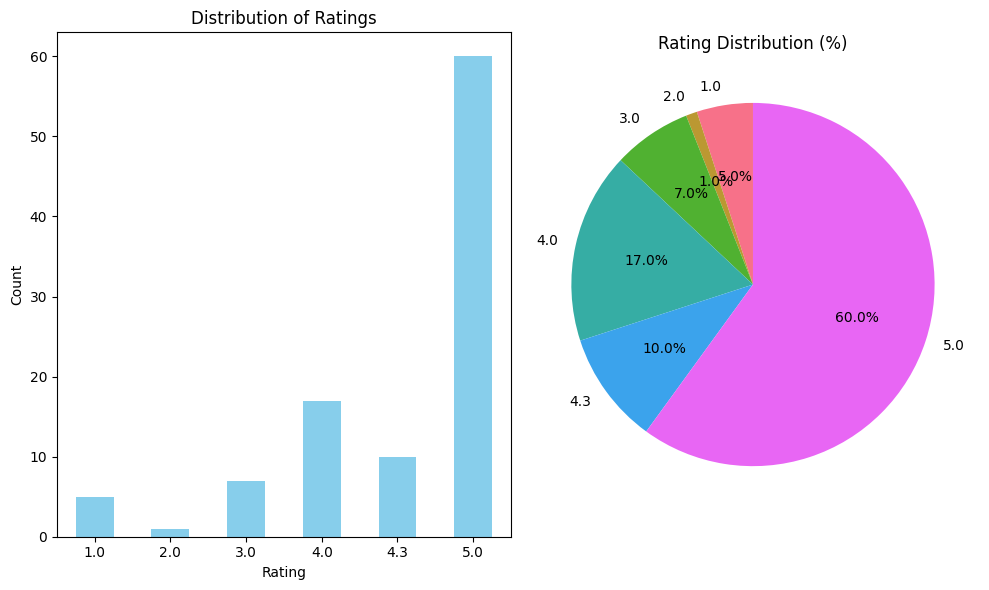


Rating Statistics:
Minimum rating: 1.0
Maximum rating: 5.0
Median rating: 5.0


In [17]:
# Basic statistics
print("=== BASIC STATISTICS ===")
print(f"Total reviews: {len(df_clean)}")
print(f"Average rating: {df_clean['rating'].mean():.2f}")
print(f"Rating distribution:")

# Rating distribution
rating_counts = df_clean['rating'].value_counts().sort_index()
print(rating_counts)

# Plot rating distribution
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Rating Distribution (%)')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nRating Statistics:")
print(f"Minimum rating: {df_clean['rating'].min()}")
print(f"Maximum rating: {df_clean['rating'].max()}")
print(f"Median rating: {df_clean['rating'].median()}")

**Sentiment Analysis using TextBlob**

=== SENTIMENT ANALYSIS RESULTS ===
sentiment_category
Positive    95
Neutral      4
Negative     1
Name: count, dtype: int64


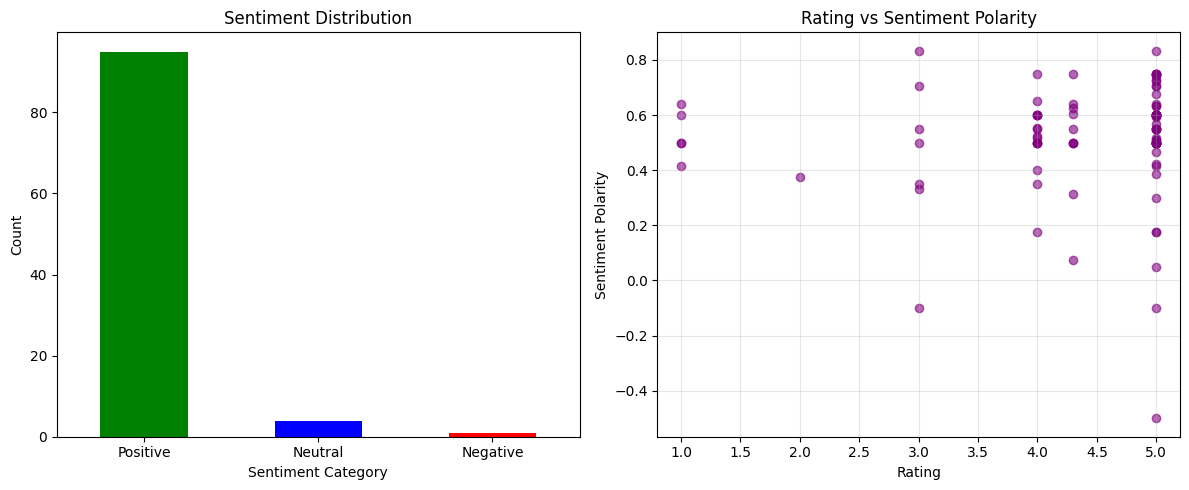


Correlation between rating and sentiment: 0.062


In [18]:
# Function to get sentiment polarity
def get_sentiment(text):
    if isinstance(text, str) and text.strip():
        return TextBlob(text).sentiment.polarity
    return 0

# Apply sentiment analysis
df_clean['sentiment'] = df_clean['cleaned_review'].apply(get_sentiment)

# Categorize sentiment
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_clean['sentiment_category'] = df_clean['sentiment'].apply(categorize_sentiment)

# Display sentiment results
print("=== SENTIMENT ANALYSIS RESULTS ===")
sentiment_counts = df_clean['sentiment_category'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.scatter(df_clean['rating'], df_clean['sentiment'], alpha=0.6, color='purple')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')
plt.title('Rating vs Sentiment Polarity')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation between rating and sentiment
correlation = df_clean['rating'].corr(df_clean['sentiment'])
print(f"\nCorrelation between rating and sentiment: {correlation:.3f}")

**Review Length Analysis**

=== REVIEW LENGTH ANALYSIS ===
Average review length: 10.8 words
Median review length: 7.0 words
Longest review: 95 words
Shortest review: 2 words


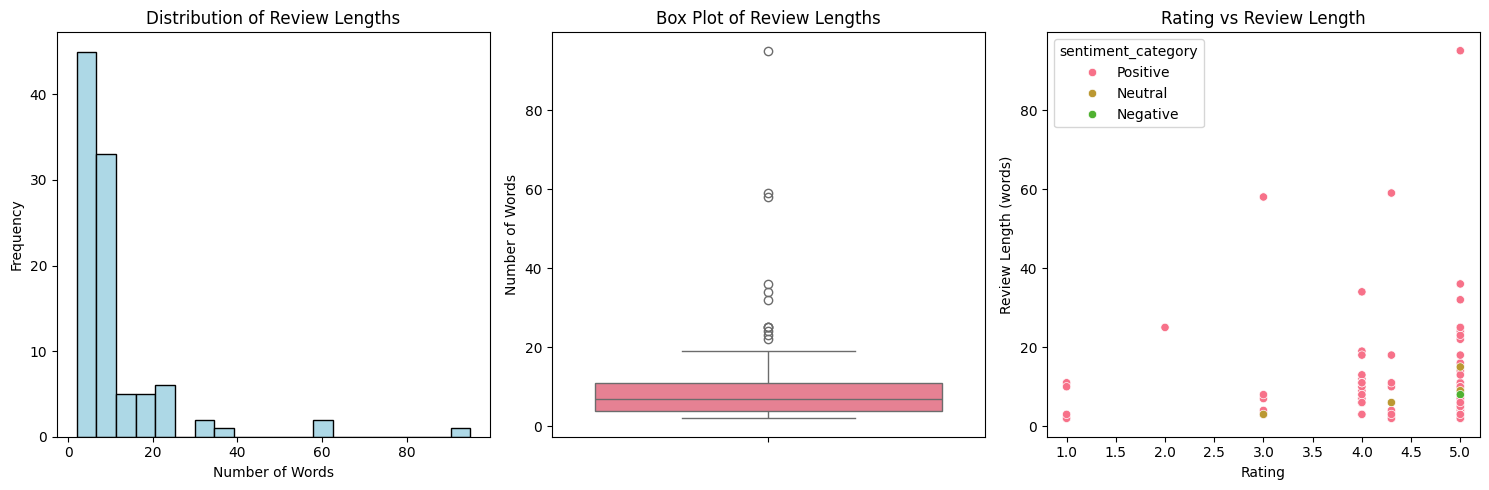

In [20]:
# Calculate review length
df_clean['review_length'] = df_clean['cleaned_review'].apply(lambda x: len(str(x).split()))

print("=== REVIEW LENGTH ANALYSIS ===")
print(f"Average review length: {df_clean['review_length'].mean():.1f} words")
print(f"Median review length: {df_clean['review_length'].median():.1f} words")
print(f"Longest review: {df_clean['review_length'].max()} words")
print(f"Shortest review: {df_clean['review_length'].min()} words")

# Plot review length distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_clean['review_length'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_clean['review_length'])
plt.title('Box Plot of Review Lengths')
plt.ylabel('Number of Words')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df_clean['rating'], y=df_clean['review_length'], hue=df_clean['sentiment_category'])
plt.title('Rating vs Review Length')
plt.xlabel('Rating')
plt.ylabel('Review Length (words)')

plt.tight_layout()
plt.show()

**Word Cloud Generation**

=== WORD CLOUD ANALYSIS ===


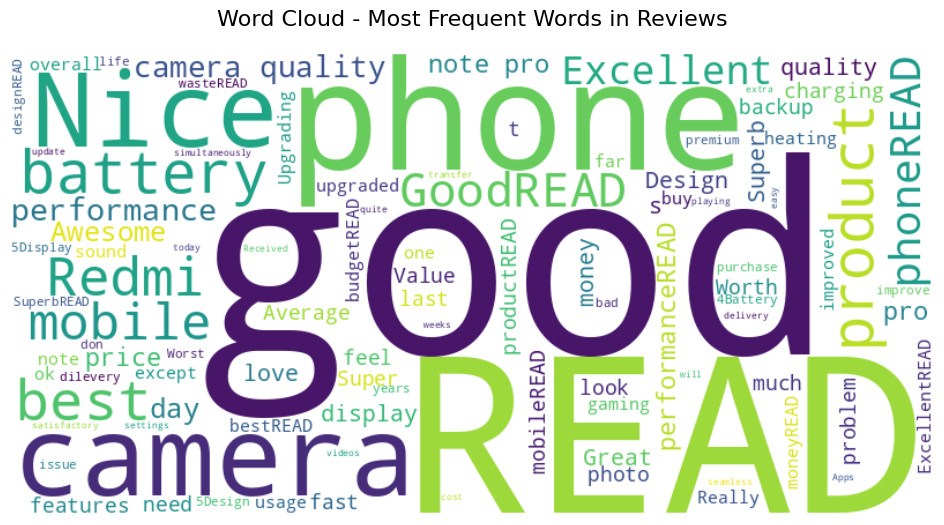

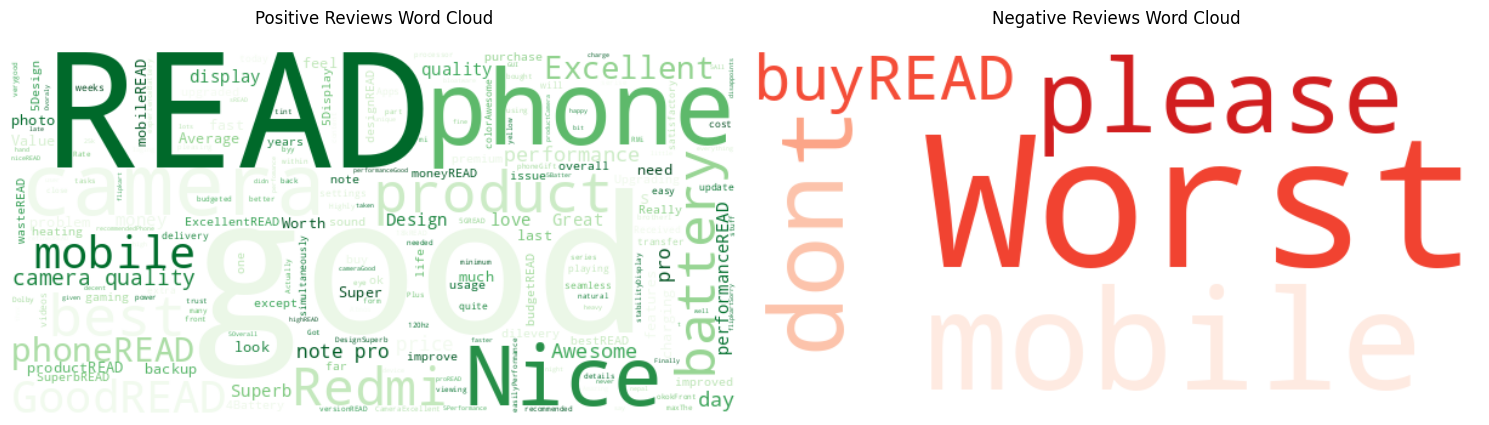

In [21]:
# Generate word cloud for all reviews
print("=== WORD CLOUD ANALYSIS ===")

all_reviews = ' '.join(df_clean['cleaned_review'].dropna())

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis',
    contour_width=1,
    contour_color='steelblue'
).generate(all_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words in Reviews', fontsize=16, pad=20)
plt.show()

# Generate word clouds by sentiment
positive_reviews = ' '.join(df_clean[df_clean['sentiment_category'] == 'Positive']['cleaned_review'].dropna())
negative_reviews = ' '.join(df_clean[df_clean['sentiment_category'] == 'Negative']['cleaned_review'].dropna())

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=600, height=300, background_color='white', colormap='Greens').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud', pad=20)

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=600, height=300, background_color='white', colormap='Reds').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud', pad=20)

plt.tight_layout()
plt.show()

**Feature Analysis - Most Discussed Aspects**

=== FEATURE MENTION ANALYSIS ===
Total mentions of each feature:
Camera: 33 mentions
Battery: 28 mentions
Value: 22 mentions
Performance: 21 mentions
Design: 16 mentions
Display: 12 mentions


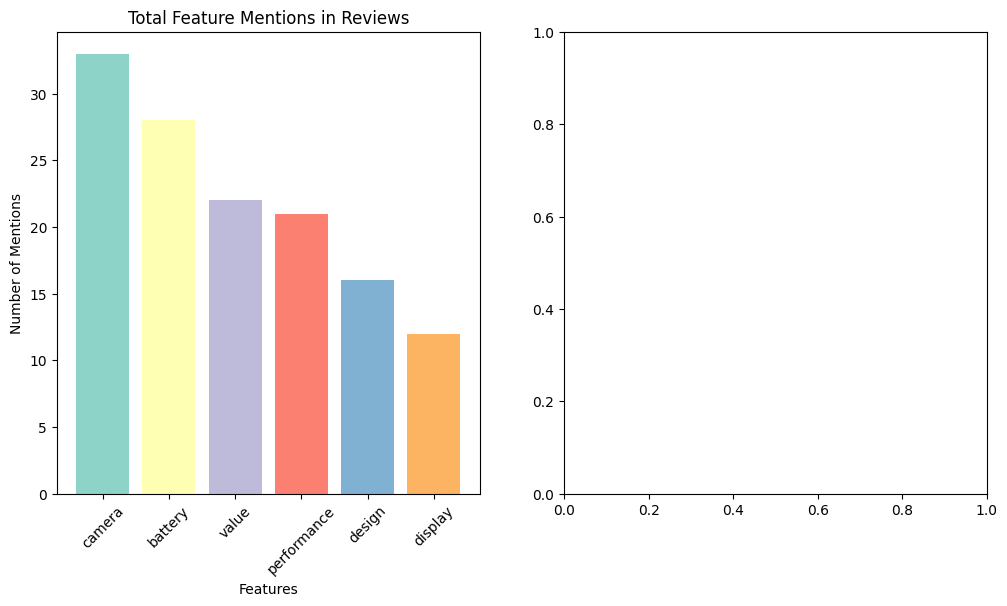

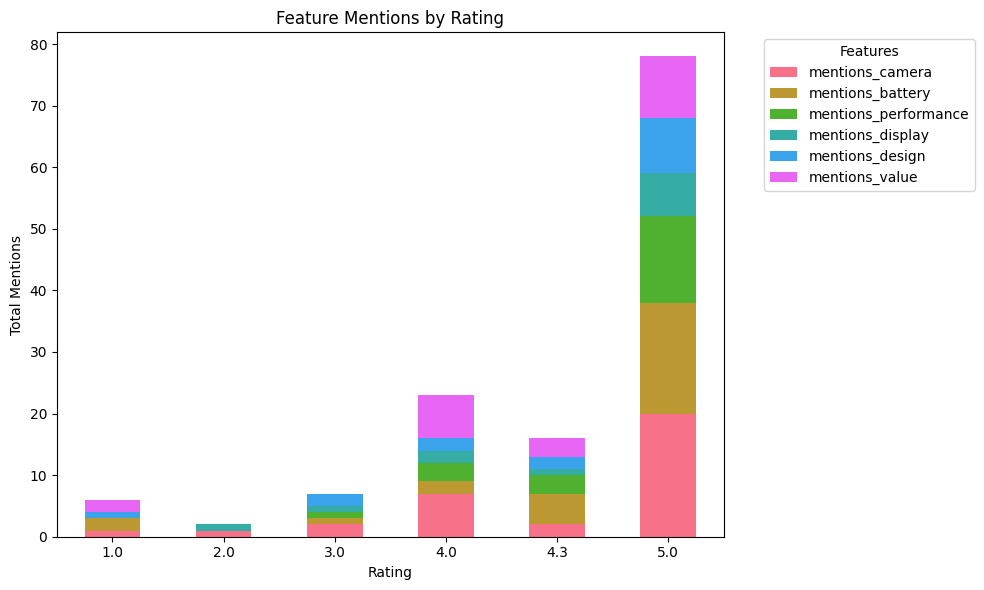

In [25]:
# Define keywords for different features
feature_keywords = {
    'camera': ['camera', 'photo', 'picture', 'selfie', 'front camera', 'back camera', 'image'],
    'battery': ['battery', 'charge', 'charging', 'backup', 'power', 'battery life'],
    'performance': ['performance', 'speed', 'fast', 'slow', 'lag', 'smooth', 'processor'],
    'display': ['display', 'screen', '120hz', 'hz', 'viewing', 'display quality'],
    'design': ['design', 'look', 'slim', 'premium', 'build', 'appearance'],
    'value': ['price', 'value', 'money', 'budget', 'worth', 'cost']
}

# Function to count feature mentions
def count_feature_mentions(text, feature_keywords):
    text_lower = str(text).lower()
    counts = {}
    for feature, keywords in feature_keywords.items():
        counts[feature] = sum(1 for keyword in keywords if keyword in text_lower)
    return counts

# Apply feature counting
feature_counts = pd.DataFrame()
for feature in feature_keywords.keys():
    df_clean[f'mentions_{feature}'] = df_clean['cleaned_review'].apply(
        lambda x: count_feature_mentions(x, feature_keywords)[feature]
    )

# Calculate total mentions
total_mentions = {feature: df_clean[f'mentions_{feature}'].sum() for feature in feature_keywords.keys()}

print("=== FEATURE MENTION ANALYSIS ===")
print("Total mentions of each feature:")
for feature, count in sorted(total_mentions.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature.capitalize()}: {count} mentions")

# Plot feature mentions
plt.figure(figsize=(12, 6))

features_sorted = sorted(total_mentions.items(), key=lambda x: x[1], reverse=True)
features, counts = zip(*features_sorted)

plt.subplot(1, 2, 1)
plt.bar(features, counts, color=plt.cm.Set3(np.arange(len(features))))
plt.title('Total Feature Mentions in Reviews')
plt.xlabel('Features')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Feature mentions by rating
feature_by_rating = df_clean.groupby('rating')[['mentions_' + f for f in feature_keywords.keys()]].sum()
feature_by_rating.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Feature Mentions by Rating')
plt.xlabel('Rating')
plt.ylabel('Total Mentions')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Detailed Analysis of High and Low Ratings**

In [23]:
print("=== DETAILED RATING ANALYSIS ===")

# High ratings (4.3 and above)
high_ratings = df_clean[df_clean['rating'] >= 4.3]
print(f"High ratings (≥4.3): {len(high_ratings)} reviews")

# Low ratings (3 and below)
low_ratings = df_clean[df_clean['rating'] <= 3]
print(f"Low ratings (≤3): {len(low_ratings)} reviews")

# Analyze common themes in high ratings
print("\n=== COMMON THEMES IN HIGH RATINGS ===")
high_positive_aspects = {}
for feature in feature_keywords.keys():
    high_positive_aspects[feature] = high_ratings[f'mentions_{feature}'].sum()

for feature, count in sorted(high_positive_aspects.items(), key=lambda x: x[1], reverse=True)[:3]:
    print(f"Top praised: {feature.capitalize()} ({count} mentions)")

# Analyze common themes in low ratings
print("\n=== COMMON THEMES IN LOW RATINGS ===")
low_negative_aspects = {}
for feature in feature_keywords.keys():
    low_negative_aspects[feature] = low_ratings[f'mentions_{feature}'].sum()

for feature, count in sorted(low_negative_aspects.items(), key=lambda x: x[1], reverse=True)[:3]:
    print(f"Most criticized: {feature.capitalize()} ({count} mentions)")

# Display sample reviews from each category
print("\n=== SAMPLE HIGH RATING REVIEWS ===")
for i, (_, row) in enumerate(high_ratings.head(2).iterrows()):
    print(f"Review {i+1}: {row['cleaned_review'][:150]}...")

print("\n=== SAMPLE LOW RATING REVIEWS ===")
for i, (_, row) in enumerate(low_ratings.head(2).iterrows()):
    print(f"Review {i+1}: {row['cleaned_review'][:150]}...")

=== DETAILED RATING ANALYSIS ===
High ratings (≥4.3): 70 reviews
Low ratings (≤3): 13 reviews

=== COMMON THEMES IN HIGH RATINGS ===
Top praised: Battery (23 mentions)
Top praised: Camera (22 mentions)
Top praised: Performance (17 mentions)

=== COMMON THEMES IN LOW RATINGS ===
Most criticized: Camera (4 mentions)
Most criticized: Battery (3 mentions)
Most criticized: Design (3 mentions)

=== SAMPLE HIGH RATING REVIEWS ===
Review 1: Excellent phone Received today with 1 day delivery at no extra cost I upgraded from Redmi Note 8 pro to this one Apps and settings transfer was seamle...
Review 2: Nice colorAwesome CameraExcellent DesignSuperb PerformanceREAD MORE...

=== SAMPLE LOW RATING REVIEWS ===
Review 1: Very niceREAD MORE...
Review 2: I have been a redmi user for the last 8 years and redmi never disappoints this phone is also very nice and in hand feel is very premium it s not too h...


**Comprehensive Summary and Insights**

=== COMPREHENSIVE ANALYSIS SUMMARY ===

📊 OVERALL STATISTICS:
• Total Reviews Analyzed: 100
• Average Rating: 4.39/5
• Positive Sentiment: 95 reviews
• Neutral Sentiment: 4 reviews
• Negative Sentiment: 1 reviews

🔍 KEY FINDINGS:
• Most Discussed Features:
  - Camera: 33 mentions
  - Battery: 28 mentions
  - Value: 22 mentions

• Highest sentiment for rating 5.0: 0.532
• Lowest sentiment for rating 2.0: 0.375
• 87.0% of reviews are 4 stars or higher


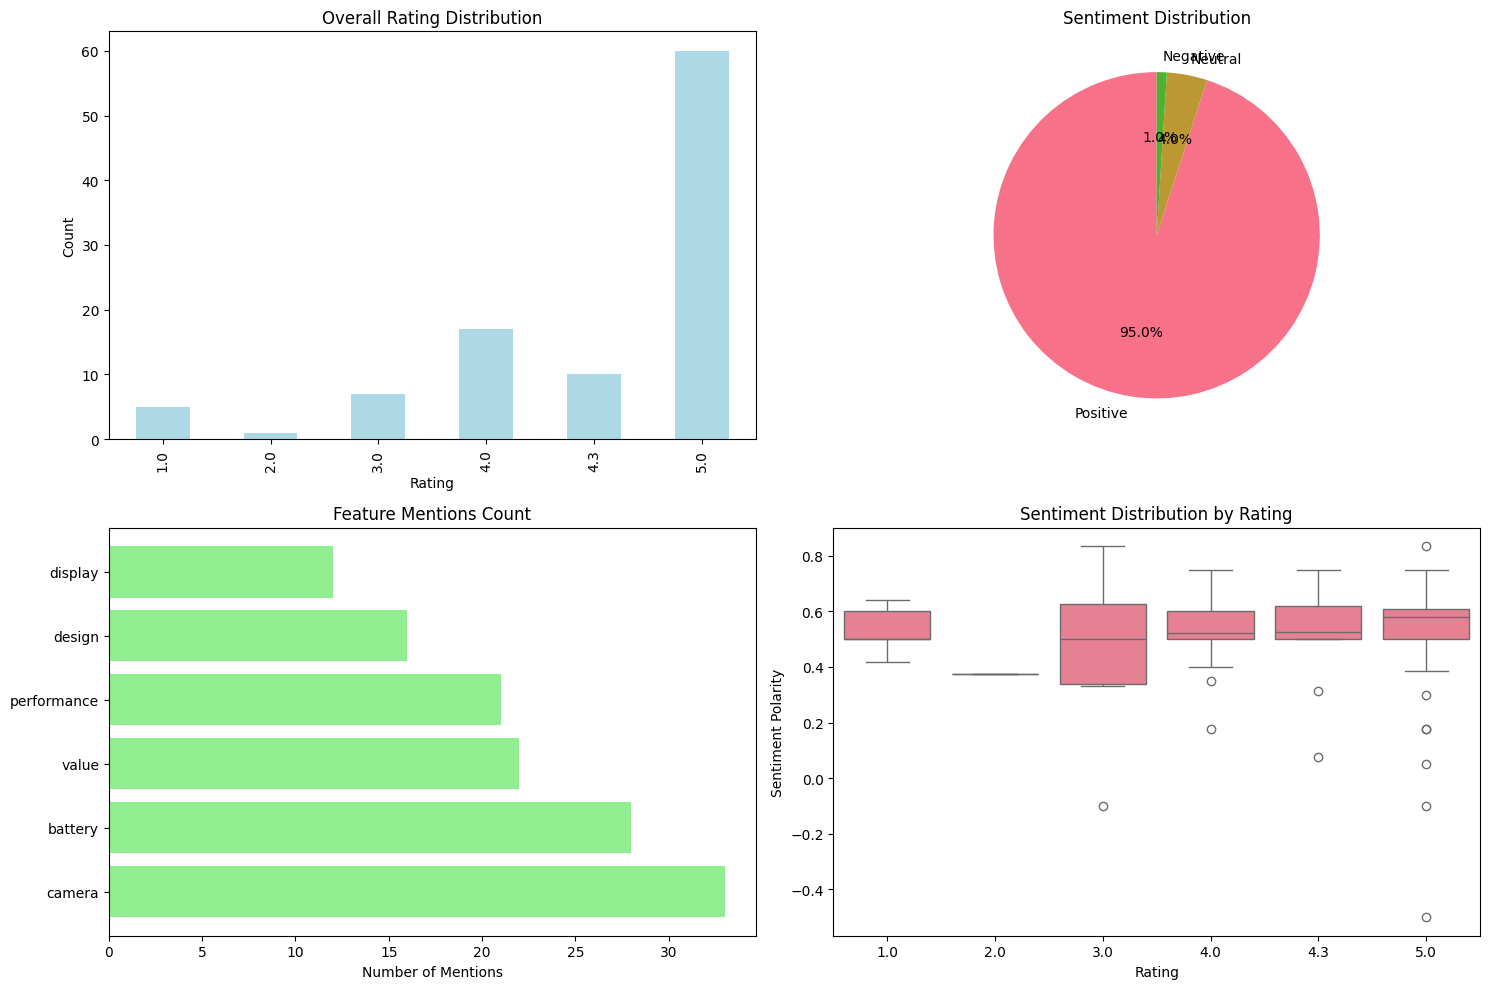


✅ ANALYSIS COMPLETED SUCCESSFULLY!
Total reviews processed: 100
Check the visualizations above for detailed insights.


In [28]:
print("=== COMPREHENSIVE ANALYSIS SUMMARY ===")
print("="*50)

# Overall statistics
print("\n📊 OVERALL STATISTICS:")
print(f"• Total Reviews Analyzed: {len(df_clean)}")
print(f"• Average Rating: {df_clean['rating'].mean():.2f}/5")
print(f"• Positive Sentiment: {(df_clean['sentiment_category'] == 'Positive').sum()} reviews")
print(f"• Neutral Sentiment: {(df_clean['sentiment_category'] == 'Neutral').sum()} reviews")
print(f"• Negative Sentiment: {(df_clean['sentiment_category'] == 'Negative').sum()} reviews")

# Key findings
print("\n🔍 KEY FINDINGS:")

# Most discussed features
top_features = sorted(total_mentions.items(), key=lambda x: x[1], reverse=True)[:3]
print("• Most Discussed Features:")
for feature, count in top_features:
    print(f"  - {feature.capitalize()}: {count} mentions")

# Sentiment insights
avg_sentiment_by_rating = df_clean.groupby('rating')['sentiment'].mean()
print(f"\n• Highest sentiment for rating {avg_sentiment_by_rating.idxmax()}: {avg_sentiment_by_rating.max():.3f}")
print(f"• Lowest sentiment for rating {avg_sentiment_by_rating.idxmin()}: {avg_sentiment_by_rating.min():.3f}")

# Rating distribution insights
rating_percentage = (df_clean['rating'] >= 4).mean() * 100
print(f"• {rating_percentage:.1f}% of reviews are 4 stars or higher")

# Final visualization
plt.figure(figsize=(15, 10))

# Plot 1: Overall rating distribution
plt.subplot(2, 2, 1)
df_clean['rating'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title('Overall Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# Plot 2: Sentiment distribution
plt.subplot(2, 2, 2)
df_clean['sentiment_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.ylabel('')

# Plot 3: Feature mentions
plt.subplot(2, 2, 3)
features, counts = zip(*sorted(total_mentions.items(), key=lambda x: x[1], reverse=True))
plt.barh(features, counts, color='lightgreen')
plt.title('Feature Mentions Count')
plt.xlabel('Number of Mentions')

# Plot 4: Rating vs Sentiment
plt.subplot(2, 2, 4)
sns.boxplot(x='rating', y='sentiment', data=df_clean)
plt.title('Sentiment Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')

plt.tight_layout()
plt.show()

print("\n✅ ANALYSIS COMPLETED SUCCESSFULLY!")
print(f"Total reviews processed: {len(df_clean)}")
print("Check the visualizations above for detailed insights.")

**Business Insights & Recommendations**

In [36]:
print("=== BUSINESS INSIGHTS & RECOMMENDATIONS ===\n")

import numpy as np

avg_rating = df['rating'].mean()
positive_pct = (df['rating'] >= 4).mean() * 100.0
n_reviews = len(df)

print("1) OVERALL PERFORMANCE")
print(f"   Reviews: {n_reviews}")
print(f"   Average Rating: {avg_rating:.2f}/5.00")
print(f"   Positive Reviews (4-5★): {positive_pct:.1f}%")

# Strengths & areas from keywords (from cleaned_review if present)
src = 'cleaned_review' if 'cleaned_review' in df.columns else 'review'
def keyword_count(word):
    return int(df[src].astype(str).str.contains(fr'\b{re.escape(word)}\b', case=False, regex=True).sum())

print("\n2) KEY STRENGTHS (mentions)")
strength_words = ['good', 'excellent', 'awesome', 'great', 'best', 'nice', 'fast', 'easy']
for w in strength_words:
    c = keyword_count(w)
    if c > 0:
        print(f"   ✅ {w}: {c}")

print("\n3) AREAS FOR IMPROVEMENT (mentions)")
improve_words = ['bad', 'poor', 'worst', 'issue', 'problem', 'slow', 'bug', 'delay', 'refund']
for w in improve_words:
    c = keyword_count(w)
    if c > 0:
        print(f"   ⚠️  {w}: {c}")

print("\n4) STRATEGIC RECOMMENDATIONS")
if avg_rating >= 4.2:
    print("   • Maintain quality; amplify social proof with recent 5★ quotes.")
    print("   • Introduce referral/loyalty to convert satisfied users into advocates.")
elif avg_rating >= 3.5:
    print("   • Prioritize top 2–3 pain points from 'improvement' keywords.")
    print("   • Close the loop: respond publicly to low-star reviews within 24–48h.")
else:
    print("   • Launch a quality sprint: triage issues tagged 'slow', 'bug', 'refund'.")
    print("   • Add in-app feedback prompts post-resolution to rebuild sentiment.")

# Simple actionable signals from ML features (if available)
if {'sentiment','review_length','word_count'}.issubset(df.columns):
    high_len = np.percentile(df['review_length'], 90)
    print("\n5) OPERATIONAL SIGNALS")
    print(f"   • Very long reviews (> P90 ≈ {int(high_len)} chars) often reflect edge cases—triage these quickly.")
    print("   • Track weekly average sentiment and word_count to monitor the impact of fixes.")

print("\n✅ COMPREHENSIVE ANALYSIS COMPLETED!")


=== BUSINESS INSIGHTS & RECOMMENDATIONS ===

1) OVERALL PERFORMANCE
   Reviews: 93
   Average Rating: 4.36/5.00
   Positive Reviews (4-5★): 86.0%

2) KEY STRENGTHS (mentions)
   ✅ good: 38
   ✅ excellent: 7
   ✅ awesome: 6
   ✅ great: 4
   ✅ best: 11
   ✅ nice: 15
   ✅ fast: 3
   ✅ easy: 1

3) AREAS FOR IMPROVEMENT (mentions)
   ⚠️  bad: 2
   ⚠️  poor: 1
   ⚠️  worst: 1
   ⚠️  issue: 2
   ⚠️  problem: 2

4) STRATEGIC RECOMMENDATIONS
   • Maintain quality; amplify social proof with recent 5★ quotes.
   • Introduce referral/loyalty to convert satisfied users into advocates.

✅ COMPREHENSIVE ANALYSIS COMPLETED!
